路徑設定

In [ ]:
%cd /content/drive/MyDrive/GAI_final_project

/content/drive/MyDrive/GAI_final_project


## 讀取相關套件

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def origin_text_len_plot(df):
    plt.title("Length of original text")
    df["裁判原文"].apply(len).plot(kind='hist', bins=40)
    plt.xlabel("count")
    plt.ylabel("length of text")
    plt.show()

def summary_len_plot(df):
    plt.title("Length of summary")
    df["摘要"].apply(len).plot(kind='hist', bins=40)
    plt.xlabel("count")
    plt.ylabel("length of text")
    plt.show()

### 讀取資料集
* train
* test

In [ ]:
train_df = pd.read_excel("train.xlsx")
test_df  = pd.read_excel("test.xlsx")
train_df.head()

,Unnamed: 0,期數,出刊日,案件類型,類型,頁數,裁判字號,爭點,裁判日期,裁判案由,摘要,裁判原文
0,解讀裁判周報,42,201802,刑事法,程序法,45-46,最高法院106年度台非字第155號刑事判決,沒入具保人繳納之保證金，係對被告逃匿後，所給予具保人之制裁，自應以被告確實在逃匿中為其要件。...,106年8月23日,詐欺沒入保證金,（一）具保之被告逃匿者，應命具保人繳納指定之保證金額，並沒入之。不繳納者，強制執行。保證金已...,最高法院刑事判決106年度台非字第155號上訴人最高法院檢察署檢察總長被告李韋達具保人即受裁...
1,解讀裁判周報,28,201612,公法,勞工法,52-53,最高法院105年台上字第1528號民事判決,民法第483條之1規定，受僱人服勞務，其生命、身體、健康有受危害之虞者，僱用人應按其情形為必...,105年9月8日,請求給付職災補償等,"查被上訴人所受增加生活上需要、勞動能力喪失、精神慰撫金之損害共計1,270萬6,671元，其...",最高法院民事判決一○五年度台上字第一五二八號上訴人陳明旭即正豐五金工程行訴訟代理人姚昭秀律師...
2,解讀裁判周報,29,201701,刑事法,實體法,28-29,最高法院105年度台上字第499號刑事判決,政府採購法第34條第2項規定，機關辦理採購，不得於開標前洩漏底價，領標、投標廠商之名稱與家數...,105年2月26日,違反貪污治罪條例,政府採購法第34條第2項規定，機關辦理採購，不得於開標前洩漏底價，領標、投標廠商之名稱與家數...,最高法院刑事判決一○五年度台上字第四九九號上訴人陳森源上列上訴人因違反貪污治罪條例案件，不服...
3,解讀裁判周報,22,201606,公法,行政法,53-55,最高行政法院105年度判字第160號判決,有關法規命令之發布，行政機關得否僅以在網站上公告之方式為之？,105年4月8日,政府採購法,一、 政府採購法第31條第2項第8款即為立法者於立法定制時，基於政府採購法規範之採購事項的複...,最高行政法院判決105年度判字第160號上訴人衛生福利部豐原醫院代表人李明輝訴訟代理人洪塗生...
4,解讀裁判周報,33,201705,公法,行政法,72-75,最高行政法院106年度判字第170號判決,行政法院就廢棄物清理法第27條第11款授權訂定之法規命令為具體法規審查。,106年4月7日,廢棄物清理法,一、 廢棄物清理法第1條前段揭示該法立法目的為「有效清除、處理廢棄物，改善環境衛生，維護國民...,最高行政法院判決106年度判字第170號上訴人吳武明訴訟代理人莊國明律師被上訴人宜蘭縣政府環...


找出資料中的 noise -> 長度過短

In [ ]:
print("train_df 判決原文長度比 400 小：")
for i in train_df.loc[train_df["裁判原文"].apply(len) < 400, "裁判原文"].index:
    print("------------------------------------------------------")
    print(i, train_df.loc[i,"裁判原文"])

print()

print("test_df 判決原文長度比 400 小：")
for i in test_df.loc[test_df["裁判原文"].apply(len) < 400, "裁判原文"].index:
    print("------------------------------------------------------")
    print(i, test_df.loc[i,"裁判原文"])

train_df 判決原文長度比 400 小：
------------------------------------------------------
22 最高行政法院判決106年度判字第182號上訴人日商電化股份有限公司代表人山本學訴訟代理人葉信金專利師被上訴人經濟部智慧財產局代表人洪淑敏上列當事人間發明專利申請事件，上訴人對於中華民國105年1月21日智慧財產法院104年度行專訴字第93號行政判決，提起上訴，本院判決如下：主文上訴駁回。上訴審訴訟費用由上訴人負擔。理由請點選下方附件連結以取得判決全文。中華民國106年4月13日最高行政法院第一庭審判長法官劉鑫楨法官胡方新法官程怡怡法官張國勳法官汪漢卿以上正本證明與原本無異中華民國106年4月13日書記官莊子誼關鍵詞：光學膜用共聚合體優先權存取碼電子交換Access-Code
------------------------------------------------------
51 最高行政法院判決105年度判字第618號上訴人鉅侖科技股份有限公司代表人黃培峰訴訟代理人黃厚誠律師被上訴人經濟部智慧財產局代表人洪淑敏參加人崇治企業有限公司代表人曾麗鈴上列當事人間新型專利舉發事件，上訴人對於中華民國104年9月17日智慧財產法院104年度行專訴字第25號行政判決，提起上訴，本院判決如下：主文上訴駁回。上訴審訴訟費用由上訴人負擔。理由請點選下方附件連結以取得判決全文。中華民國105年11月24日最高行政法院第一庭審判長法官劉鑫楨法官胡方新法官程怡怡法官張國勳法官汪漢卿以上正本證明與原本無異中華民國105年11月24日書記官莊子誼關鍵詞：新型第M407248號專利晶圓包膜紙(二)開放式連接詞標籤紙之改良構造新型第507683號專利
------------------------------------------------------
100 最高行政法院判決106年度判字第278號上訴人蕭興仁訴訟代理人蔡文玲律師被上訴人經濟部智慧財產局代表人洪淑敏參加人景岳生物科技股份有限公司代表人陳根德訴訟代理人俞伯璋律師洪聖濠律師陳孚竹專利代理人上列當事人間發明專利舉發事件，上訴人對於中華民國105年3月3日智慧財產法院104年度行專訴字第77號行政判決，提起上訴，本院判決如下：主文上訴駁回。上訴審訴訟費用由上訴

In [ ]:
train_df = train_df.drop(train_df.loc[train_df["裁判原文"].apply(len) < 400, "裁判原文"].index)
train_df.reset_index(drop=True, inplace=True)
train_df.head(3)

,Unnamed: 0,期數,出刊日,案件類型,類型,頁數,裁判字號,爭點,裁判日期,裁判案由,摘要,裁判原文
0,解讀裁判周報,42,201802,刑事法,程序法,45-46,最高法院106年度台非字第155號刑事判決,沒入具保人繳納之保證金，係對被告逃匿後，所給予具保人之制裁，自應以被告確實在逃匿中為其要件。...,106年8月23日,詐欺沒入保證金,（一）具保之被告逃匿者，應命具保人繳納指定之保證金額，並沒入之。不繳納者，強制執行。保證金已...,最高法院刑事判決106年度台非字第155號上訴人最高法院檢察署檢察總長被告李韋達具保人即受裁...
1,解讀裁判周報,28,201612,公法,勞工法,52-53,最高法院105年台上字第1528號民事判決,民法第483條之1規定，受僱人服勞務，其生命、身體、健康有受危害之虞者，僱用人應按其情形為必...,105年9月8日,請求給付職災補償等,"查被上訴人所受增加生活上需要、勞動能力喪失、精神慰撫金之損害共計1,270萬6,671元，其...",最高法院民事判決一○五年度台上字第一五二八號上訴人陳明旭即正豐五金工程行訴訟代理人姚昭秀律師...
2,解讀裁判周報,29,201701,刑事法,實體法,28-29,最高法院105年度台上字第499號刑事判決,政府採購法第34條第2項規定，機關辦理採購，不得於開標前洩漏底價，領標、投標廠商之名稱與家數...,105年2月26日,違反貪污治罪條例,政府採購法第34條第2項規定，機關辦理採購，不得於開標前洩漏底價，領標、投標廠商之名稱與家數...,最高法院刑事判決一○五年度台上字第四九九號上訴人陳森源上列上訴人因違反貪污治罪條例案件，不服...


In [ ]:
test_df = test_df.drop(test_df.loc[test_df["裁判原文"].apply(len) < 400, "裁判原文"].index)
test_df.reset_index(drop=True, inplace=True)
test_df.head(3)

,Unnamed: 0,期數,出刊日,案件類型,類型,頁數,裁判字號,爭點,裁判日期,裁判案由,裁判原文
0,解讀裁判周報,41,201801,公法,智慧財產權法,70-73,最高行政法院106年度判字第651號行政判決,專利進步性審查時，應如何判斷該發明所屬技術領域中具有通常知識者是否有動機能結合複數引證之技術...,106年11月22日,新型專利舉發,最高行政法院判決106年度判字第651號上訴人鑫茂機械工業股份有限公司代表人劉金源訴訟代理人...
1,解讀裁判周報,30,201702,民事法,實體法,2024-09-10 00:00:00,最高法院105年度台上字第1250號民事判決,所謂被害人與有過失，係指被害人苟能盡其善良管理人之自我注意，即得避免其損害之發生或擴大，竟不...,105年7月27日,請求確認債權不存在,最高法院民事判決一○五年度台上字第一二五○號上訴人任順律師即榮電股份有限公司破產管理人參加人...
2,解讀裁判周報,38,201710,刑事法,實體法,36-36,最高法院106年度台上字第675號刑事判決,正當防衛必須對於現在不法之侵害始得為之，而互毆係屬多數動作構成單純一罪而互為攻擊之傷害行為，...,106年3月22日,殺人,最高法院刑事判決一○六年度台上字第六七五號上訴人張道宗選任辯護人李宗炎律師上列上訴人因殺人案...


In [ ]:
def delete_former_part(text):

    keywords = ["裁定如下", "判決如下", "決定如下"]
    text = str(text)

    for keyword in keywords:
        idx = text.find(keyword)
        if idx >= 0:
            break

    if idx < 0:
        return text
    else:
        return text[idx:]

def delete_latter_part(text):

    keywords = ["判決如主文", "裁定如主文", "決定如主文"]
    text = str(text)

    for keyword in keywords:
        idx = text.find(keyword)
        if idx >= 0:
            break

    if idx < 0:
        return text
    else:
        return text[:idx+5]

In [ ]:
train_df["裁判原文"] = train_df["裁判原文"].apply(delete_former_part)
train_df["裁判原文"] = train_df["裁判原文"].apply(delete_latter_part)
for text in train_df["裁判原文"]:
    print(text[:10], "<><>", text[-10:])

判決如下：主文上訴駁 <><> 446條，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 1項前段，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 九十五條，判決如主文
決定如下：主文請求駁 <><> 1項中段，決定如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 條第1項，判決如主文
判決如下：主文上訴駁 <><> 九十五條，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 百零一條，判決如主文
判決如下：主文上訴駁 <><> 七十八條，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 條第1項，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判

In [ ]:
test_df["裁判原文"] = test_df["裁判原文"].apply(delete_former_part)
test_df["裁判原文"] = test_df["裁判原文"].apply(delete_latter_part)
for text in test_df["裁判原文"]:
    print(text[:10], "<><>", text[-10:])

判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 百零一條，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文上訴駁 <><> 條第二項，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 七十八條，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 九十五條，判決如主文
判決如下：主文兩造上 <><> 1項前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 條第一項，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文上訴駁 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 條第1項，判決如主文
判決如下：主文原判決 <><> 百零一條，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文上訴駁 <><> 七十八條，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文上訴駁 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 百零一條，判決如主文
判決如下：主文原判決 <><> 條第1項，判決如主文
判決如下：主文上訴駁 <><> 五條前段，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判決如下：主文上訴駁 <><> 四十六條，判決如主文
判決如下：主文上訴駁 <><> 七十八條，判決如主文
判決如下：主文原判決 <><> 條第二項，判決如主文
判決如下：主文上訴駁 <><> 1項前段，判決如主文
判

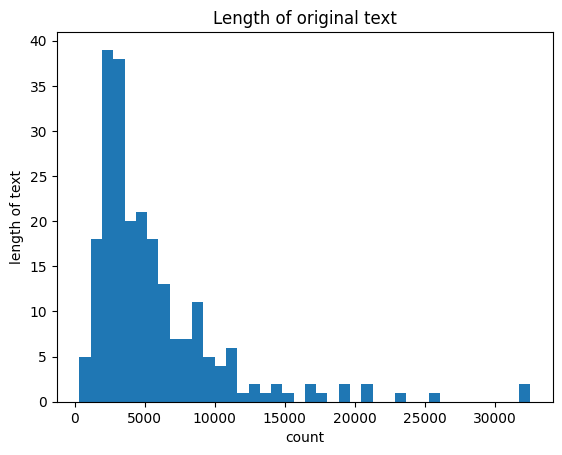

In [ ]:
origin_text_len_plot(train_df)

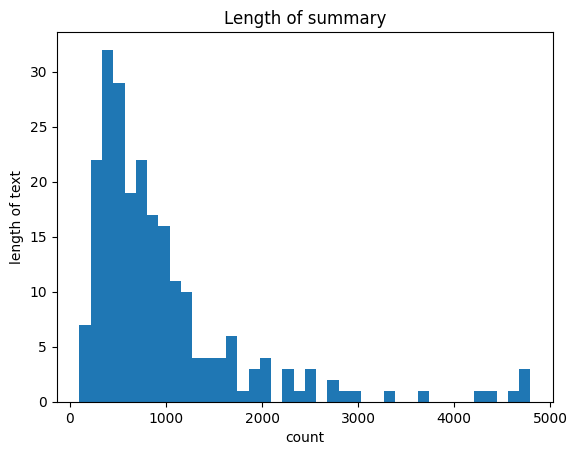

In [ ]:
summary_len_plot(train_df)

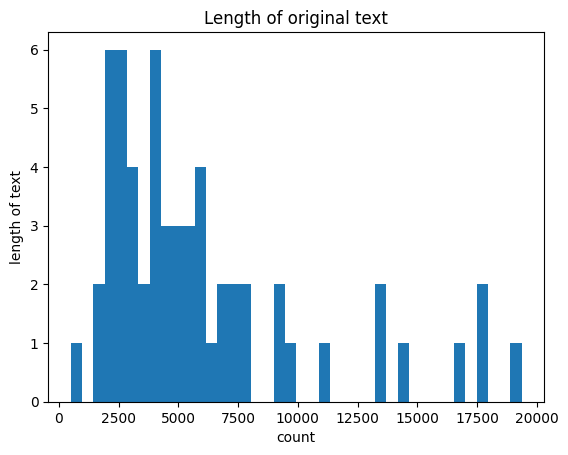

In [ ]:
origin_text_len_plot(test_df)

In [ ]:
from tqdm import tqdm

def find_common_substrings(a, b, size=50):
    substrings = set()
    len_a = len(a)

    chinese_punc = set(list("。！？；：，、）（」「"))

    i = 0

    while i < len_a:
        found_match = False
        # Check substrings starting from i with at least 50 characters
        for j in range(i + size + 1, len_a + 1):
            substring = a[i:j]
            if substring in b:
                # Once a match of at least 50 characters is found, extend until the next period
                start = i
                end = j
                while start >= 0 and a[start] not in chinese_punc:
                    start -= 1
                while end < len_a and a[end] != '。':
                    end += 1
                if end < len_a and a[end] == '。':
                    end += 1  # Include the period in the substring
                extended_substring = a[start+1:end]
                substrings.add(extended_substring)
                i = end  # Move to the position right after the current match
                found_match = True
                break

        if not found_match:
            i += 1  # Only increment by 1 if no match was found in the inner loop

    return list(substrings)

results = []
for summary, original in tqdm(zip(train_df["摘要"], train_df["裁判原文"]), total=len(train_df)):
    results.append(find_common_substrings(summary, original, 50))

100%|██████████| 230/230 [01:38<00:00,  2.33it/s]


In [ ]:
total_count = []
for result in results:
    cnt = 0
    for s in result:
        cnt += len(s)
    total_count.append(cnt)

train_df["共同長度"] = total_count
train_df.head()

,Unnamed: 0,期數,出刊日,案件類型,類型,頁數,裁判字號,爭點,裁判日期,裁判案由,摘要,裁判原文,共同長度
0,解讀裁判周報,42,201802,刑事法,程序法,45-46,最高法院106年度台非字第155號刑事判決,沒入具保人繳納之保證金，係對被告逃匿後，所給予具保人之制裁，自應以被告確實在逃匿中為其要件。...,106年8月23日,詐欺沒入保證金,（一）具保之被告逃匿者，應命具保人繳納指定之保證金額，並沒入之。不繳納者，強制執行。保證金已...,判決如下：主文上訴駁回。理由一、本件非常上訴理由稱：「按刑事訴訟法第118條之沒入保證金，...,519
1,解讀裁判周報,28,201612,公法,勞工法,52-53,最高法院105年台上字第1528號民事判決,民法第483條之1規定，受僱人服勞務，其生命、身體、健康有受危害之虞者，僱用人應按其情形為必...,105年9月8日,請求給付職災補償等,"查被上訴人所受增加生活上需要、勞動能力喪失、精神慰撫金之損害共計1,270萬6,671元，其...",判決如下：主文原判決關於命上訴人給付被上訴人新台幣肆佰捌拾伍萬玖仟捌佰捌拾貳元本息及該訴訟費...,586
2,解讀裁判周報,29,201701,刑事法,實體法,28-29,最高法院105年度台上字第499號刑事判決,政府採購法第34條第2項規定，機關辦理採購，不得於開標前洩漏底價，領標、投標廠商之名稱與家數...,105年2月26日,違反貪污治罪條例,政府採購法第34條第2項規定，機關辦理採購，不得於開標前洩漏底價，領標、投標廠商之名稱與家數...,判決如下：主文上訴駁回。理由一、按刑事訴訟法第三百七十七條規定，上訴於第三審法院，非以判決違...,432
3,解讀裁判周報,22,201606,公法,行政法,53-55,最高行政法院105年度判字第160號判決,有關法規命令之發布，行政機關得否僅以在網站上公告之方式為之？,105年4月8日,政府採購法,一、 政府採購法第31條第2項第8款即為立法者於立法定制時，基於政府採購法規範之採購事項的複...,判決如下：主文上訴駁回。上訴審訴訟費用由上訴人負擔。理由一、緣被上訴人參與上訴人辦理之「64...,1466
4,解讀裁判周報,33,201705,公法,行政法,72-75,最高行政法院106年度判字第170號判決,行政法院就廢棄物清理法第27條第11款授權訂定之法規命令為具體法規審查。,106年4月7日,廢棄物清理法,一、 廢棄物清理法第1條前段揭示該法立法目的為「有效清除、處理廢棄物，改善環境衛生，維護國民...,判決如下：主文原判決廢棄。訴願決定及原處分均撤銷。第一審及上訴審訴訟費用均由被上訴人負擔。理...,2136


In [ ]:
def show_ratio(column_name="共同長度"):

    ratio = train_df[column_name] / train_df['摘要'].apply(len)

    # 設定區間範圍，以 0.2 為區間
    interval = 0.1
    bins = np.arange(0, ratio.max() + interval, interval)

    # 計算每個區間的計數
    hist, bin_edges = np.histogram(ratio, bins=bins)

    # 創建結果表格
    hist_df = pd.DataFrame({
        '區間': [f'{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}' for i in range(len(bin_edges)-1)],
        '計數': hist
    })

    # 打印結果表格
    print(hist_df)

    # 繪製分佈圖
    ax = hist_df.set_index('區間')['計數'].plot(kind='bar', rot=90)
    plt.xlabel('Ratio Intervals')
    plt.ylabel('Frequency')
    plt.title('Distribution of len(copy words) / len(summary) ')

    # 在每個條形上方添加數值標籤
    for i in range(len(hist_df)):
        ax.text(i, hist_df['計數'][i], hist_df['計數'][i], ha='center', va='bottom')

    plt.show()

        區間   計數
0  0.0-0.1    5
1  0.1-0.2    0
2  0.2-0.3    5
3  0.3-0.4   12
4  0.4-0.5    5
5  0.5-0.6   14
6  0.6-0.7   19
7  0.7-0.8   18
8  0.8-0.9   50
9  0.9-1.0  102


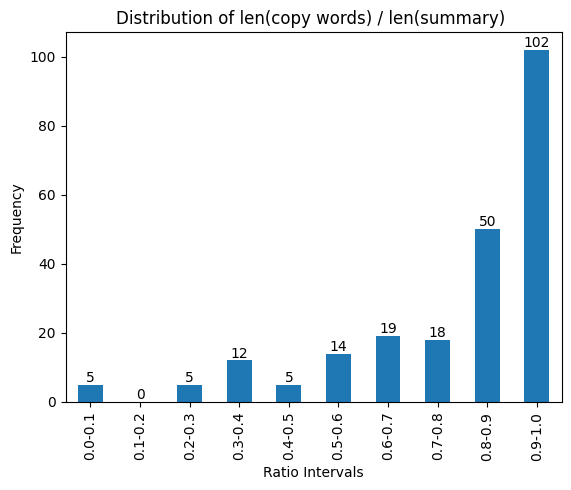

In [ ]:
show_ratio("共同長度")

In [ ]:
threshold = 4000

long_indices = (train_df[train_df["裁判原文"].apply(len) >= threshold]).index
# long_indices = train_df.index
before = []
after = []

for summary, original in tqdm(zip(train_df.loc[long_indices, "摘要"], train_df.loc[long_indices, "裁判原文"]), total=len(train_df.loc[long_indices,:])):
    before.append(find_common_substrings(summary, original, 50))

for summary, original in tqdm(zip(train_df.loc[long_indices, "摘要"], train_df.loc[long_indices, "裁判原文"]), total=len(train_df.loc[long_indices,:])):
    after.append(find_common_substrings(summary[-threshold:], original, 50))

before_count = []
after_count = []

for b in before:
    cnt = 0
    for s in b:
        cnt += len(s)
    before_count.append(cnt)

for a in after:
    cnt = 0
    for s in a:
        cnt += len(s)
    after_count.append(cnt)

100%|██████████| 230/230 [00:31<00:00,  7.37it/s]


In [ ]:
count = 0
for i in range(len(before_count)):
    if before_count[i] != after_count[i]:
        print(i, before_count[i], after_count[i])
        count += 1

print(count)

3 1466 1397
4 2136 1448
11 1636 1459
21 3182 1416
23 4516 1471
27 2237 1488
32 2042 1487
33 1643 1450
35 2609 1425
40 1511 1397
53 1575 1359
60 1410 1178
64 1663 1500
65 1176 1163
81 1471 1470
88 1753 1252
97 2828 1495
99 2251 1356
104 2649 1454
115 1757 1482
117 2360 1457
120 4455 1494
134 2162 1401
136 2923 1491
145 4606 1491
162 3453 1287
163 1987 1500
169 1544 1402
176 3492 1195
185 1941 1481
191 1590 1393
194 2462 1499
203 1893 1473
205 4625 1496
207 1372 1273
221 4138 1458
227 2222 1464
37


In [ ]:
def clean_text(text, threshold=4000):
    if len(text) >= threshold:
        return text[-threshold:]
    return text

In [ ]:
train_df['裁判原文'] = train_df["裁判原文"].apply(clean_text)
train_df.to_excel("train_clean.xlsx")

In [ ]:
test_df['裁判原文'] = test_df["裁判原文"].apply(clean_text)
test_df.to_excel("test_clean.xlsx")

In [ ]:
results = []
for summary, original in tqdm(zip(train_df["摘要"], train_df["裁判原文"]), total=len(train_df)):
    results.append(find_common_substrings(summary, original, 50))

100%|██████████| 230/230 [03:24<00:00,  1.13it/s]


In [ ]:
data = []

for i, origin_text in enumerate(train_df["裁判原文"]):
    sentences = [s for s in origin_text.split("。") ]
    for s in sentences:
        datum = {"sentence": s, "label": 0}
        for result in results[i]:
            if result in s or s in result:
                datum["label"] = 1
                break

        data.append(datum)

pd.DataFrame(data).to_csv("tain_pair.csv", index=False)

In [ ]:
data = []

for i, origin_text in enumerate(test_df["裁判原文"]):
    sentences = [s for s in origin_text.split("。") ]
    for s in sentences:
        datum = {"sentence": s}
        data.append(datum)

pd.DataFrame(data).to_csv("test_pair.csv", index=False)